<a href="https://colab.research.google.com/github/DarkStarQuantumLab/NashEquilibrium/blob/main/Nash_Equilibrium.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Calculating Nash Equilibrium on Quantum Annealers
by the Team of Dark Star Quantum Lab, North Carolina, USA \\
Olga Okrut  \\
Keith Cannon \\
Kareem El-safty \\
Faisal Shah Khan \\
Nada Elsokkary \\

Email: faisal@darkstarquantumlab.com



# Nash Equilibrium As a Quadratic Function 
## Same number of pure strategies

$max: p^{T}(M+N)q -\alpha-\beta$

subject to: 

$Mq - \alpha e <=0$ \
$ N^{T} p - \beta l <=0 $\
$e^{T} p -1 = 0$\
$L^{T} q -1 = 0$\
$p, q >=0 $\
where $e$ and $l$ are vectors of ones with dimentions $n x 1$ and $m x 1$ respectively. $\alpha$ and $\beta$ are scalar values. 

Reformulating linear inequality constrains to equalities by introducing slack variable, we obtain the following constrains:

$Mq - \alpha e + \zeta =0$ \
$ N^{T} p - \beta l + \eta =0 $\
$e^{T} p -1 = 0$\
$L^{T} q -1 = 0$\
$p, q >=0 $


For more details, refer to the paper [*Calculating Nash Equilibrium on Quantum Annealers*.](https://arxiv.org/abs/2112.12583)

# Battle of the Sexes 

We shall now consider an example of a two-person nonzero-sum game - the Battle of the Sexes. 

Problem formulation: A couple, Adam and Beth, decide independently whether
to go to a soccer game or to the ballet in the evening. Each person likes to do something together with the other, but the man prefers soccer, and the woman prefers ballet. 

We shall assume that the total payoff for each player is the sum of the payoffs in terms of satisfaction of being at the preffered place with the partner. For instance, for Adam chossing "soccer" (+2 points to satisfaction), Beth's best response would be "soccer" as well (+1 point to satisfaction). For Beth choosing "ballet" (+2 points), Adam's best responce is "ballet" (+1 point). If both decide to visit different places, both of them would be dissatisfied. The table below depicts payoffs for the dicsussed situations. 





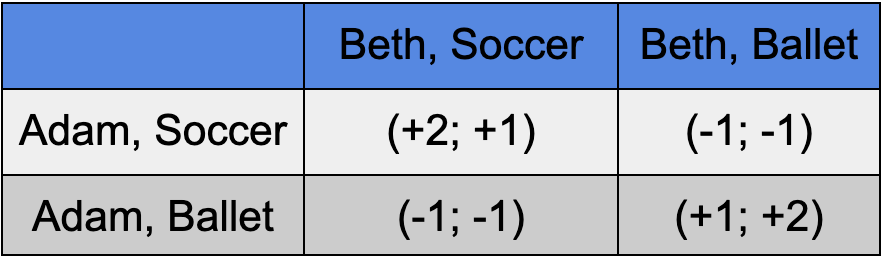

We further assume that Adam and Beth can not negotiate preplay. 

The Battle of the Sexes is the game with more than one Nash  equlibrium that exists in pure and mixed strategies. Because of the current quantum hardware limitations, we shall explore Nash equilibrium at pure strategy only. 

As we can see from the table, the Nash equlibrium reaches at "soccer - soccer" or "ballet-ballet" with the total payoff in terms of satisfaction of 3.

Let $P$ represent Adam's choise of strategy with the payoff matrix $M$.

\begin{align}
        \ P = \begin{pmatrix}
        \ p_1  \\
        \ p_2
        \end{pmatrix}.
    \end{align}

  \begin{align}
        \ M = \begin{pmatrix}
        \ 2 & \ -1 \\
        \ -1 & \ 1 
        \end{pmatrix}.
    \end{align} \\
And $Q$ represents Beth's choise of startegy with the payoff matrix $N$
\begin{align}
        \ Q = \begin{pmatrix}
        \ q_1  \\
        \ q_2
        \end{pmatrix}.
    \end{align} 

  \begin{align}
        \ N = \begin{pmatrix}
        \ 1 & \ -1 \\
        \ -1 & \ 2 
        \end{pmatrix}.
    \end{align}

  To find equilibrium points $P$ and $Q$ (e.g. the vector of pure strategies) that yeild the optimum payoffs for both players we shall solve:

$ max: F = P^T (M + N) Q$ \\

Taking into account that DWave Quantum annealer minimizes an objective function $F$, we shall consider $-F$.

$ min: -F = -1 * \begin{pmatrix}
        \ p_1 & p_2\end{pmatrix} * \begin{align}
                                    \begin{pmatrix}
                                  \ 3 & \ -2 \\\\ -2 & \ 3 
                                  \end{pmatrix}\end{align} * \begin{pmatrix} \ q_1  \\\ q_2\end{pmatrix} + \alpha + \beta$

subject to: 

$ 2q_1-q_2 - \alpha \leq 0 $ \\

$ -q_1 + q_2 - \alpha \leq 0 $ \\

$ p_1- p_2 - \beta \leq 0 $ \\

$-p_1 + 2p_2 - \beta \leq  0 $ \\

$p_1 + p_2 -1 = 0$ \\

$q_1 + q_2 -1 = 0$ \\

The condition $p_i,q_i \geq 0$ is satisfied since $p$ and $q$ are binary: $ (p,q \in {0,1}) $




In [ ]:
#modules installation
!python -m pip install dwave-ocean-sdk
!python -m pip install dwave-neal

     |████████████████████████████████| 497 kB 11.4 MB/s 
     |████████████████████████████████| 229 kB 52.2 MB/s 
     |████████████████████████████████| 13.2 MB 31.9 MB/s 
     |████████████████████████████████| 655 kB 43.8 MB/s 
     |████████████████████████████████| 935 kB 56.7 MB/s 
     |████████████████████████████████| 69 kB 9.1 MB/s 
     |████████████████████████████████| 97 kB 8.3 MB/s 
     |████████████████████████████████| 271 kB 59.3 MB/s 
     |████████████████████████████████| 89 kB 8.5 MB/s 
     |████████████████████████████████| 108 kB 55.9 MB/s 
     |████████████████████████████████| 5.0 MB 40.4 MB/s 
     |████████████████████████████████| 696 kB 49.2 MB/s 
     |████████████████████████████████| 67 kB 6.5 MB/s 
     |████████████████████████████████| 10.9 MB 23.8 MB/s 
     |████████████████████████████████| 44 kB 2.9 MB/s 
     |████████████████████████████████| 246 kB 21.4 MB/s 
     |████████████████████████████████| 38.1 MB 1.3 MB/s 
     |████████████████

In [ ]:
from dimod import Binary, BQM, ExactSolver
import matplotlib.pyplot as plt
import dimod, re
import neal

In [ ]:
#Contracting QUBO Matrix
Q = {('p1', 'q1'):-3, ('p1', 'q2'):2, ('p2', 'q1'):2, ('p2', 'q2'):-3}

bqm = BQM(Q, vartype='BINARY')

# constraints on probability
bqm.add_linear_equality_constraint(
    [('p1',1), ('p2', 1)], constant=-1, lagrange_multiplier=10
)
bqm.add_linear_equality_constraint(
    [('q1',1), ('q2', 1)],  constant=-1, lagrange_multiplier=10
)

# inequality constraints
# might be irrelevant for this problem
bqm.add_linear_inequality_constraint(
    [('q1', 2), ('q2', -1)], lb=-1, ub=2, lagrange_multiplier=1, label = 'constr1'
)
bqm.add_linear_inequality_constraint(
    [('q1', -1), ('q2', 1)], lb=-1, ub=1, lagrange_multiplier=1, label = 'constr2'
)
bqm.add_linear_inequality_constraint(
    [('p1', 1), ('p2', -1)], lb=-1, ub=1, lagrange_multiplier=1, label = 'constr3'
)
bqm.add_linear_inequality_constraint(
    [('p1', 1), ('p2', 2)], lb=-1, ub=2, lagrange_multiplier=1, label = 'constr4'
)

sampler = neal.SimulatedAnnealingSampler()
sampleset = sampler.sample(bqm, num_reads=5000)
sampleset.lowest()

/usr/local/lib/python3.7/dist-packages/dimod/binary/binary_quadratic_model.py:760: UserWarning: Did not add constraint constr1. This constraint is feasible with any value for state variables.
  f'Did not add constraint {label}.'
/usr/local/lib/python3.7/dist-packages/dimod/binary/binary_quadratic_model.py:760: UserWarning: Did not add constraint constr2. This constraint is feasible with any value for state variables.
  f'Did not add constraint {label}.'
/usr/local/lib/python3.7/dist-packages/dimod/binary/binary_quadratic_model.py:760: UserWarning: Did not add constraint constr3. This constraint is feasible with any value for state variables.
  f'Did not add constraint {label}.'


SampleSet(rec.array([([0, 1, 0, 1, 0, 0], -3., 1), ([1, 0, 1, 0, 0, 1], -3., 1),
           ([1, 0, 1, 0, 1, 0], -3., 1), ...,
           ([1, 0, 1, 0, 1, 0], -3., 1), ([1, 0, 1, 0, 0, 1], -3., 1),
           ([1, 0, 1, 0, 1, 0], -3., 1)],
          dtype=[('sample', 'i1', (6,)), ('energy', '<f8'), ('num_occurrences', '<i8')]), Variables(['p1', 'p2', 'q1', 'q2', 'slack_constr4_0', 'slack_constr4_1']), {'beta_range': [0.07701635339554948, 18.420680743952367], 'beta_schedule_type': 'geometric'}, 'BINARY')

In [ ]:
sampleset.lowest()

SampleSet(rec.array([([0, 1, 0, 1, 0, 0], -3., 1), ([1, 0, 1, 0, 0, 1], -3., 1),
           ([1, 0, 1, 0, 1, 0], -3., 1), ...,
           ([1, 0, 1, 0, 1, 0], -3., 1), ([1, 0, 1, 0, 0, 1], -3., 1),
           ([1, 0, 1, 0, 1, 0], -3., 1)],
          dtype=[('sample', 'i1', (6,)), ('energy', '<f8'), ('num_occurrences', '<i8')]), Variables(['p1', 'p2', 'q1', 'q2', 'slack_constr4_0', 'slack_constr4_1']), {'beta_range': [0.07701635339554948, 18.420680743952367], 'beta_schedule_type': 'geometric'}, 'BINARY')

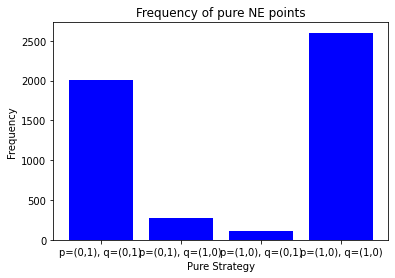

In [ ]:
# plot results

def plot_sampleset(sampleset):
    '''Plots results of sampling in a bar style.
        Arg: sampleset: a set of samples prodused by DWave's sampler
    '''
        
    keep_vars =['p1', 'p2', 'q1', 'q2']
    sampleset = dimod.keep_variables(sampleset, keep_vars)
    sampleset = sampleset.aggregate()

    df = sampleset.to_pandas_dataframe()

    strategies = {}
    for i, row in df.iterrows():
        strategy = str(df['p1'][i])+str(df['p2'][i])+str(df['q1'][i])+str(df['q2'][i])
        if len((re.findall('1', strategy))) <=2:
            strategies[strategy]=row['num_occurrences']
    
    myList = strategies.items()
    myList = [('p=(' + item[0][:1]+','+ item[0][1:2]+'), q=('+item[0][2:3]+','+ item[0][3:] +')', item[1]) for item in myList]
    myList = sorted(myList) 
    x, y = zip(*myList) 

    plt.bar(x,y, color='Blue')
    plt.title('Frequency of pure NE points')
    plt.xlabel('Pure Strategy')
    plt.ylabel('Frequency')
    plt.savefig('Frequency_2strategies.png', dpi=600)
    plt.show()


plot_sampleset(sampleset=sampleset)

# Two players Game with three pure Nash Equilibrium points

We shall explore the application of quantum annealers on the following biological example discussed in the short [overview on game theory](https://www.britannica.com/science/game-theory/The-prisoners-dilemma). The table below ellustrates the payoffs when two male birds confront each other when competing for resources. The birds can behave as 'hawks' fighting for the resources or as 'doves' avoiding any serious harm. In any case, birds will lose the competition since a species containing only 'hawks' would have a high casuality rate, where spicies containing 'doves' only can be vulnerable to an invasions or mutations. Hence, the third type of behavior called 'bourgeois' would be more stable then pure 'hawks' or pure 'dove' strategy. A 'bourgeois' can act like a 'hawk' or a 'dove' depending on an external situation. 

![picture](https://cdn.britannica.com/56/91956-050-AAAD7DA0/retreat-behaviour-attack-Bourgeois-strategy-population-individuals.jpg)

So, what combinations of types are stable and most likely to evolve? Let $P$ represent the strategy choise of the first player with the payoff matrix $M$. In this case the strategy vector represents a collection of choises $(hawk, dove, bourgeois)$. The payoff can be thought of as a number of offspring a species produces.  
 
\begin{align}
        \ P = \begin{pmatrix}
        \ p_1  \\
        \ p_2 \\
        \ p_3 \\
        \end{pmatrix}.
    \end{align}

  \begin{align}
        M=\begin{pmatrix}
\ -5 & \ 10  & \ 2.5\\
\ 0 & \ 2 & \  1 \\
\ -2.5 & \ 6 & \ 5 \\
        \end{pmatrix}.
    \end{align} \\

And the $Q$ matrix represents the choise of strategy of the second player with the payoff matrix $N$
\begin{align}
        \ Q = \begin{pmatrix}
        \ q_1  \\
        \ q_2 \\
        \ q_3 \
        \end{pmatrix}.
    \end{align} 

  \begin{align}
        \ N = \begin{pmatrix}
        \ -5 & \ 0 & \ -2.5 \\
\ 10 & \ 2 & \ 6 \\
\ 2.5 & \ 1 & \ 5 \\
        \end{pmatrix}.
    \end{align}

Adding tow matrices and considering to minimize the objective function, we get


$ min: -F = -1 * \begin{pmatrix}
        \ p_1 & p_2 & p_3\end{pmatrix} * \begin{align}
                                    \begin{pmatrix}
                                  \ -10 & \ 10 & \ 0 \\\\ 10 & \ 4 & \ 7 
                                  \\\\ 0 & \ 7 & \ 10 \ 
                                  \end{pmatrix}\end{align} * \begin{pmatrix} \ q_1  \\\ q_2 \\\ q_3 \end{pmatrix} + \alpha + \beta$

subject to: 

$ -5q_1 + 10q_2 + 2.5q_3 - \alpha \leq 0 $ \\

$ 2q_2 + q_3 - \alpha \leq 0 $ \\

$ -2.5q_1 + 6q_2 + 5q_3 - \alpha \leq 0 $ \\

$ -5p_1 -2.5p_3 - \beta \leq 0 $ \\

$ 10p_1+ 2p_2 + 6p_3 - \beta \leq 0 $ \\

$ 2.5p_1+ p_2 + 5p_3 - \beta \leq 0 $ \\

$ p_1 + p_2 + p_3 - 1 = 0$ \\

$ q_1 + q_2 + q_3 - 1 = 0$ \\

The condition $p_i,q_i \geq 0$ is satisfied since $p$ and $q$ are binary: $ (p,q \in (0,1)) $



In [ ]:
#Constracting QUBO Matrix
Q = {('p1', 'q1'):10, ('p1', 'q2'):-10, ('p2', 'q2'):-4, ('p2', 'q3'):-7, ('p3', 'q3'):-10}

bqm = BQM(Q, vartype='BINARY')

# constraints on probability
bqm.add_linear_equality_constraint([('p1',1), ('p2', 1), ('p3', 1)], constant=-1, lagrange_multiplier=10)
bqm.add_linear_equality_constraint([('q1',1), ('q2', 1), ('q3', 1)],  constant=-1, lagrange_multiplier=10)

# # inequality constraints
bqm.add_linear_inequality_constraint([('q1', -2), ('q2', 4), ('q3', 1)], lb=-2, ub=4, lagrange_multiplier=1, label = 'constr1')
bqm.add_linear_inequality_constraint([('q2', 2), ('q3', 1)], lb=1, ub=2, lagrange_multiplier=1, label = 'constr2')
bqm.add_linear_inequality_constraint([('q1', -5), ('q2', 12), ('q3', 10)], lb=-5, ub=12, lagrange_multiplier=1, label = 'constr3')
bqm.add_linear_inequality_constraint([('p1', -2), ('p3', -1)], lb=-2, ub=-1, lagrange_multiplier=1, label = 'constr4')
bqm.add_linear_inequality_constraint([('p1', -5), ('p2', 1), ('p3', 3)], lb=-5, ub=3, lagrange_multiplier=1, label = 'constr5')
bqm.add_linear_inequality_constraint([('p1', 5), ('p2', 2), ('p3', 10)], lb=2, ub=10, lagrange_multiplier=1, label = 'constr6')

sampler = neal.SimulatedAnnealingSampler()
sampleset = sampler.sample(bqm, num_reads=5000)
sampleset.lowest()

SampleSet(rec.array([([1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0], -10., 1),
           ([1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0], -10., 1),
           ([0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], -10., 1),
           ...,
           ([0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], -10., 1),
           ([1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1], -10., 1),
           ([1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0], -10., 1)],
          dtype=[('sample', 'i1', (24,)), ('energy', '<f8'), ('num_occurrences', '<i8')]), Variables(['p1', 'p2', 'p3', 'q1', 'q2', 'q3', 'slack_constr1_0', 'slack_constr1_1', 'slack_constr1_2', 'slack_constr2_0', 'slack_constr3_0', 'slack_constr3_1', 'slack_constr3_2', 'slack_constr3_3', 'slack_constr3_4', 'slack_constr4_0', 'slack_constr5_0', 'slack_constr5_1', 'slack_constr5_2', 'slack_const

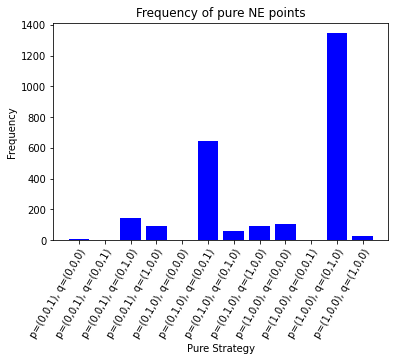

In [ ]:

def plot_sampleset3(sampleset):
    '''Plots results of sampling in a bar style.
        Arg: sampleset: a set of samples prodused by DWave's sampler
    '''
    
    keep_vars =['p1', 'p2', 'p3', 'q1', 'q2', 'q3']
    sampleset = dimod.keep_variables(sampleset, keep_vars)
    sampleset = sampleset.aggregate()

    df = sampleset.to_pandas_dataframe()

    strategies = {}
    for i, row in df.iterrows():
    #     print(row['num_occurrences'])
    #     break
        strategy = str(df['p1'][i])+str(df['p2'][i])+str(df['p3'][i])+str(df['q1'][i]) +str(df['q2'][i])+str(df['q3'][i])
        if len((re.findall('1', strategy))) <=2:
            strategies[strategy]=row['num_occurrences']

    myList = strategies.items()
    myList = [('p=('+item[0][:1]+','+ item[0][1:2]+','+item[0][2:3]+'), q=('+item[0][3:4]+','+ item[0][4:5]+','+ item[0][5:] +')', item[1]) for item in myList]
    myList = sorted(myList) 
    x, y = zip(*myList) 

    # plt.bar(x,y, color='Blue')
    plt.bar(x,y, color='Blue')
    plt.title('Frequency of pure NE points')
    plt.xlabel('Pure Strategy')
    plt.xticks(rotation = 60, horizontalalignment="right", rotation_mode="anchor") # Rotates X-Axis Ticks by 60-degrees
    plt.ylabel('Frequency')
    plt.savefig('Frequency_3strategies.png', dpi=600)
    plt.show()


plot_sampleset3(sampleset=sampleset)

# 8 by 8 Example


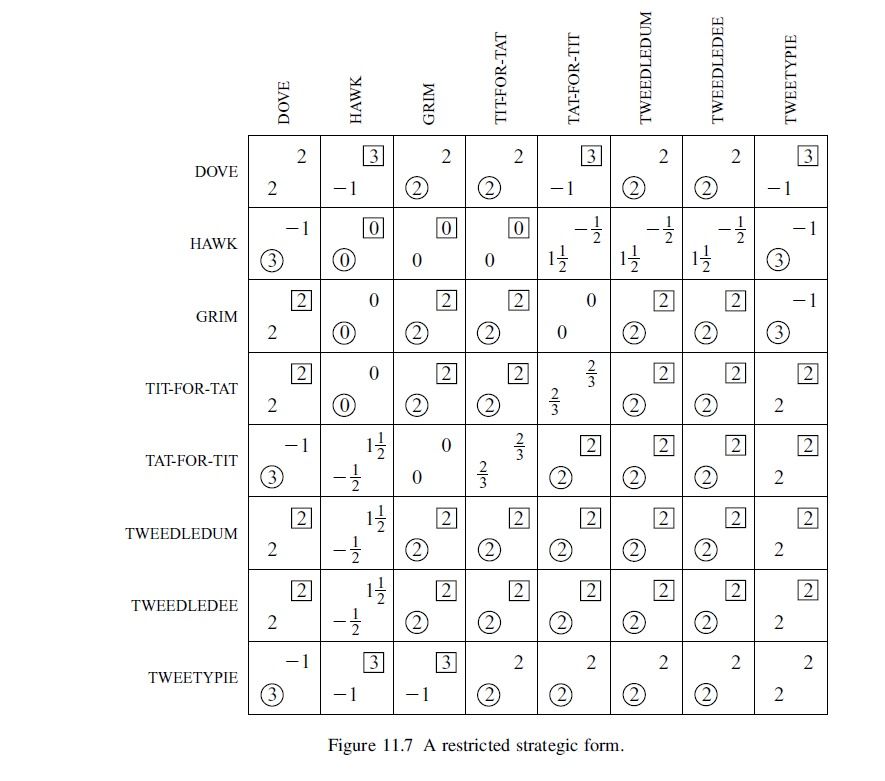

The matrix $M$ for the first player with the strategy vector (P):

\begin{align}
        \ M = \begin{pmatrix}
        \ 2 & \ 3 & \ 2 & \ 2 & 3 & \ 2 & \ 2 & 3\\
        \ -1 & \ 0 & \ 0 & \ 0 & -1/2 & \ -1/2 & \ -1/2 & -1\\
        \ 2 & \ 0 & \ 2 & \ 2 & 0 & \ 2 & \ 2 & -1 \\
        \ 2 & \ 0 & \ 2 & \ 2 & 2/3 & \ 2 & \ 2 & 2 \\
        \ -1 & \ 3/2 & \ 0 & \ 2/3 & 2 & \ 2 & \ 2 & 2 \\
        \ 2 & \ 3/2 & \ 2 & \ 2 & 2 & \ 2 & \ 2 & 2\\
        \ 2 & \ 3/2 & \ 2 & \ 2 & 2 & \ 2 & \ 2 & 2\\
        \ -1 & \ 3 & \ 3 & \ 2 & 2 & \ 2 & \ 2 & 2\\
        \end{pmatrix}.
    \end{align}


And the matrix $N$ for the second player  with the strategy vector (Q):
  \begin{align}
        \ N = \begin{pmatrix}
        \ 2 & \ -1 & \ 2 & \ 2 & -1 & \ 2 & \ 2 & -1\\
        \ 3 & \ 0 & \ 0 & \ 0 & 3/2 & \ 3/2 & \ 3/2 & 3\\
        \ 2 & \ 0 & \ 2 & \ 2 & 0 & \ 2 & \ 2 & 3 \\
        \ 2 & \ 0 & \ 2 & \ 2 & 2/3 & \ 2 & \ 2 & 2 \\
        \ 3 & \ -1/2 & \ 0 & \ 2/3 & 2 & \ 2 & \ 2 & 2 \\
        \ 2 & \ -1/2 & \ 2 & \ 2 & 2 & \ 2 & \ 2 & 2\\
        \ 2 & \ -1/2 & \ 2 & \ 2 & 2 & \ 2 & \ 2 & 2\\
        \ 3 & \ -1 & \ -1 & \ 2 & 2 & \ 2 & \ 2 & 2\\
        \end{pmatrix}.
  \end{align}


  Summing up the matrices for both players and setting up in the QUBO format:


$min: 
\begin{align} -1*(P)* 
\begin{pmatrix}
    \ 4 & \ 2 & \ 4 & \ 4 & 2 &  \ 4 & \ 4 & 2 \\
    \ 2 & \ 0 & \ 0 & \ 0 & 1 &  \ 1 &  \1 & 2 \\
    \ 4 & \ 0 & \ 4 & \ 4 & 0 &  \ 4 & \ 4 & 2 \\
    \ 4 & \ 0 & \ 4 & \ 4 & 4/3 &\ 4 & \ 4 & 4 \\
    \ 2 & \ 1 & \ 0 & \ 4/3 & 4 &\ 4 & \ 4 & 4 \\
    \ 4 & \ 1 & \ 4 & \ 4 & 4 &  \ 4 & \ 4 & 4\\
    \ 4 & \ 1 & \ 4 & \ 4 & 4 &  \ 4 & \ 4 & 4\\
    \ 2 & \ 2 & \ 2 & \ 4 & 4 &  \ 4 & \ 4 & 4\\
\end{pmatrix} *(Q) + \alpha + \beta 
\end{align} $

In [ ]:
#Constracting QUBO Matrix
Q = {('p1','q1'):-12, ('p1','q2'):-6, ('p1','q3'):-12, ('p1','q4'):-12, ('p1','q5'):-6, ('p1','q6'):-12, ('p1','q7'):-12, ('p1', 'q8'):-6,
     ('p2','q5'):-3, ('p2','q6'):-3, ('p2','q7'):-3, ('p2', 'q8'):-3,
     ('p3','q3'):-12, ('p3','q4'):-12, ('p3','q6'):-12, ('p3','q7'):-12, ('p3', 'q8'):-6,
     ('p4','q4'):-12, ('p4','q5'):-4, ('p4','q6'):-12, ('p4','q7'):-12, ('p4', 'q8'):-12,
     ('p5','q5'):-12, ('p5','q6'):-12, ('p5','q7'):-12, ('p5', 'q8'):-12,
     ('p6','q6'):-12, ('p6','q7'):-12, ('p6', 'q8'):-12,
     ('p7','q7'):-12, ('p7', 'q8'):-12,
     ('p8', 'q8'):-12}

bqm = BQM(Q, vartype='BINARY')

# constraints on probability
bqm.add_linear_equality_constraint([('p1',1), ('p2', 1), ('p3', 1), ('p4',1), ('p5', 1), ('p6', 1), ('p7',1), ('p8', 1)], constant=-1, lagrange_multiplier=100)
bqm.add_linear_equality_constraint([('q1',1), ('q2', 1), ('q3', 1), ('q4',1), ('q5', 1), ('q6', 1), ('q7',1), ('q8', 1)],  constant=-1, lagrange_multiplier=100)

# # inequality constraints
bqm.add_linear_inequality_constraint([('q1',2), ('q2',3), ('q3',2),('q4',2), ('q5', 3), ('q6', 2), ('q7', 2), ('q8', 3)], lb=2, ub=3, lagrange_multiplier=1, label = 'constr1')
bqm.add_linear_inequality_constraint([('q1',-2), ('q5', -1), ('q6', -1), ('q7', -1), ('q8', -2)], lb=-2, ub=0, lagrange_multiplier=1, label = 'constr2')
bqm.add_linear_inequality_constraint([('q1',2), ('q3',2),('q4',2), ('q6', 2), ('q7', 2), ('q8', -1)], lb=-1, ub=2, lagrange_multiplier=1, label = 'constr3')
bqm.add_linear_inequality_constraint([('q1',3), ('q3',3),('q4',3), ('q5', 1), ('q6', 3), ('q7', 3), ('q8', 3)], lb=0, ub=3, lagrange_multiplier=1, label = 'constr4')
bqm.add_linear_inequality_constraint([('q1',-6), ('q2',9),('q4',4), ('q5', 12), ('q6', 12), ('q7', 12), ('q8', 12)], lb=-6, ub=12, lagrange_multiplier=1, label = 'constr5')
bqm.add_linear_inequality_constraint([('q1',4), ('q2',3), ('q3',4),('q4',4), ('q5', 4), ('q6', 4), ('q7', 4), ('q8', 4)], lb=3, ub=4, lagrange_multiplier=1, label = 'constr6')
bqm.add_linear_inequality_constraint([('q1',4), ('q2',3), ('q3',4),('q4',4), ('q5', 4), ('q6', 4), ('q7', 4), ('q8', 4)], lb=3, ub=4, lagrange_multiplier=1, label = 'constr7')
bqm.add_linear_inequality_constraint([('q1',-1), ('q2',3), ('q3',3),('q4',2), ('q5', 2), ('q6', 2), ('q7', 2), ('q8', 2)], lb=-1, ub=4, lagrange_multiplier=1, label = 'constr8')

bqm.add_linear_inequality_constraint([('p1',2), ('p2',-1), ('p3',2), ('p4',2), ('p5',-1), ('p6',2), ('p7',2), ('p8',-1)], lb=-1, ub=2, lagrange_multiplier=1, label = 'constr9')
bqm.add_linear_inequality_constraint([('p1',2), ('p5',1), ('p6',1), ('p7',1), ('p8',2)], lb=0, ub=2, lagrange_multiplier=1, label = 'constr10')
bqm.add_linear_inequality_constraint([('p1',2), ('p3',2), ('p4',2), ('p6',2), ('p7',2), ('p8',3)], lb=0, ub=3, lagrange_multiplier=1, label = 'constr11')
bqm.add_linear_inequality_constraint([('p1',2), ('p3',2), ('p4',2), ('p5',1), ('p6',2), ('p7',2), ('p8',2)], lb=0, ub=2, lagrange_multiplier=1, label = 'constr12')
bqm.add_linear_inequality_constraint([('p1',18), ('p2',-3), ('p4',2), ('p5',12), ('p6',12), ('p7',12), ('p8',12)], lb=-3, ub=18, lagrange_multiplier=1, label = 'constr13')
bqm.add_linear_inequality_constraint([('p1',4), ('p2',-1), ('p3',4), ('p4',4), ('p5',4), ('p6',4), ('p7',4), ('p8',4)], lb=-1, ub=4, lagrange_multiplier=1, label = 'constr14')
bqm.add_linear_inequality_constraint([('p1',4), ('p2',-1), ('p3',4), ('p4',4), ('p5',4), ('p6',4), ('p7',4), ('p8',4)], lb=-1, ub=4, lagrange_multiplier=1, label = 'constr15')
bqm.add_linear_inequality_constraint([('p1',3), ('p2',-1), ('p3',-1), ('p4',2), ('p5',2), ('p6',2), ('p7',2), ('p8',2)], lb=-1, ub=3, lagrange_multiplier=1, label = 'constr14')

sampler = neal.SimulatedAnnealingSampler()
# start = time.time()
sampleset = sampler.sample(bqm, num_reads=5000)
end = time.time()
# print('Code execution time [sec]:', end - start)


In [ ]:
def plot_sampleset(sampleset, num_sample):
    '''Plots results of sampling in a bar style.
        Arg: sampleset: a set of samples prodused by DWave's sampler
             num_sample: the number of samples received from DWave's sampler'''
    
    keep_vars =['p1', 'p2', 'p3', 'p4', 'p5', 'p6', 'p7', 'p8', 'q1', 'q2', 'q3',
                'q4', 'q5', 'q6', 'q7', 'q8']
    sampleset = dimod.keep_variables(sampleset, keep_vars)
    sampleset = sampleset.aggregate()

    df = sampleset.to_pandas_dataframe()

    strategies = {}
    for i, row in df.iterrows():
        strategy = str(df['p1'][i])+str(df['p2'][i])+str(df['p3'][i]) \
                  +str(df['p4'][i])+str(df['p5'][i])+str(df['p6'][i]) \
                  +str(df['p7'][i])+str(df['p8'][i])+str(df['q1'][i]) \
                  +str(df['q2'][i])+str(df['q3'][i])+ str(df['q4'][i])+str(df['q5'][i]) \
                  +str(df['q6'][i])+str(df['q7'][i])+str(df['q8'][i])
        if len((re.findall('1', strategy))) <=2:
            strategies[strategy]=row['num_occurrences']

    myList = strategies.items()
    myList = [('p=('+item[0][:8]+'), q=('+item[0][8:] +')', item[1]) for item in myList]
    myList = sorted(myList) 
    x, y = zip(*myList) 

    plt.figure(figsize=(30,10))
    plt.bar(x,y, color='Blue')
    plt.title('Frequency of pure NE points based on ' +str(num_sample) + ' samples')
    plt.xlabel('Pure Strategy')
    plt.xticks(rotation = 90, horizontalalignment="right", rotation_mode="anchor") # Rotates X-Axis Ticks by 60-degrees
    plt.ylabel('Frequency')
    plt.tight_layout()
    plt.savefig('Frequency_3strategies.png', dpi=600)
    plt.show()



In [ ]:
plot_sampleset(sampleset=sampleset, num_sample=5000)